# New Jersey Housing Price Analysis - EDA

Dataset: housing_nj.csv  
Objective: Predict housing prices with Lasso and Ridge regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


## 1. Data Loading and Initial Exploration


In [2]:
df = pd.read_csv('housing_nj.csv', index_col=0)
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")


Dataset shape: (5711, 20)

Columns: ['url', 'region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'image_url', 'description', 'lat', 'long', 'state']


In [3]:
df.head()


,url,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
190246,https://cnj.craigslist.org/apa/d/princeton-wal...,central NJ,3450,house,1300,3,1.5,0,0,0,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00G0G_hGPrpUBJTm...,3 Bedroom house close to everything.,40.3521,-74.6625,nj
190276,https://newjersey.craigslist.org/apa/d/jersey-...,north jersey,2205,apartment,660,1,1.0,1,1,1,1,0,0,w/d in unit,attached garage,https://images.craigslist.org/00z0z_5R0Ry768Di...,"Contact info: DANIEL MENDEZ | MENDEZ GRP, Conl...",40.7372,-74.0676,nj
190313,https://newjersey.craigslist.org/apa/d/jersey-...,north jersey,2205,apartment,723,1,1.0,1,1,1,1,0,0,NaN,attached garage,https://images.craigslist.org/01414_kK1SLNbzbU...,"Contact info: DANIEL MENDEZ | MENDEZ GRP, Conl...",40.7372,-74.0676,nj
190331,https://jerseyshore.craigslist.org/apa/d/asbur...,jersey shore,1425,loft,1300,2,1.0,0,0,0,0,0,0,no laundry on site,off-street parking,https://images.craigslist.org/00C0C_fy5OrsKWWv...,"2 full Bedrooms, loft apartment on 3rd floor ...",40.2507,-74.0486,nj
190340,https://newjersey.craigslist.org/apa/d/jersey-...,north jersey,1805,apartment,510,0,1.0,1,1,1,1,0,0,w/d in unit,attached garage,https://images.craigslist.org/00z0z_5R0Ry768Di...,"Contact info: DANIEL MENDEZ | MENDEZ GRP, Conl...",40.7372,-74.0676,nj


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5711 entries, 190246 to 204532
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      5711 non-null   object 
 1   region                   5711 non-null   object 
 2   price                    5711 non-null   int64  
 3   type                     5711 non-null   object 
 4   sqfeet                   5711 non-null   int64  
 5   beds                     5711 non-null   int64  
 6   baths                    5711 non-null   float64
 7   cats_allowed             5711 non-null   int64  
 8   dogs_allowed             5711 non-null   int64  
 9   smoking_allowed          5711 non-null   int64  
 10  wheelchair_access        5711 non-null   int64  
 11  electric_vehicle_charge  5711 non-null   int64  
 12  comes_furnished          5711 non-null   int64  
 13  laundry_options          4538 non-null   object 
 14  parking_options       

In [5]:
df.describe()


,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5601.000000,5601.000000
mean,1739.403957,1035.760812,1.740151,1.441079,0.673787,0.665908,0.601646,0.267554,0.014358,0.040623,40.194521,-74.635661
std,888.009723,498.941683,0.830081,0.550262,0.468867,0.471713,0.489602,0.442722,0.118973,0.197433,1.032569,1.618398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-22.151700,-122.023000
25%,1300.000000,795.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.880500,-74.906700
50%,1646.000000,963.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.250700,-74.552800
75%,2156.000000,1192.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.582300,-74.231300
max,38000.000000,18360.000000,8.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.731800,-73.428500


## 2. Missing Values Analysis


In [6]:
missing = df.isnull().sum()
missing_pct = 100 * missing / len(df)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Percentage', ascending=False)

print("Missing values summary:")
print(missing_df[missing_df['Missing Count'] > 0])


Missing values summary:
                 Missing Count  Percentage
parking_options           1849   32.376116
laundry_options           1173   20.539310
long                       110    1.926108
lat                        110    1.926108


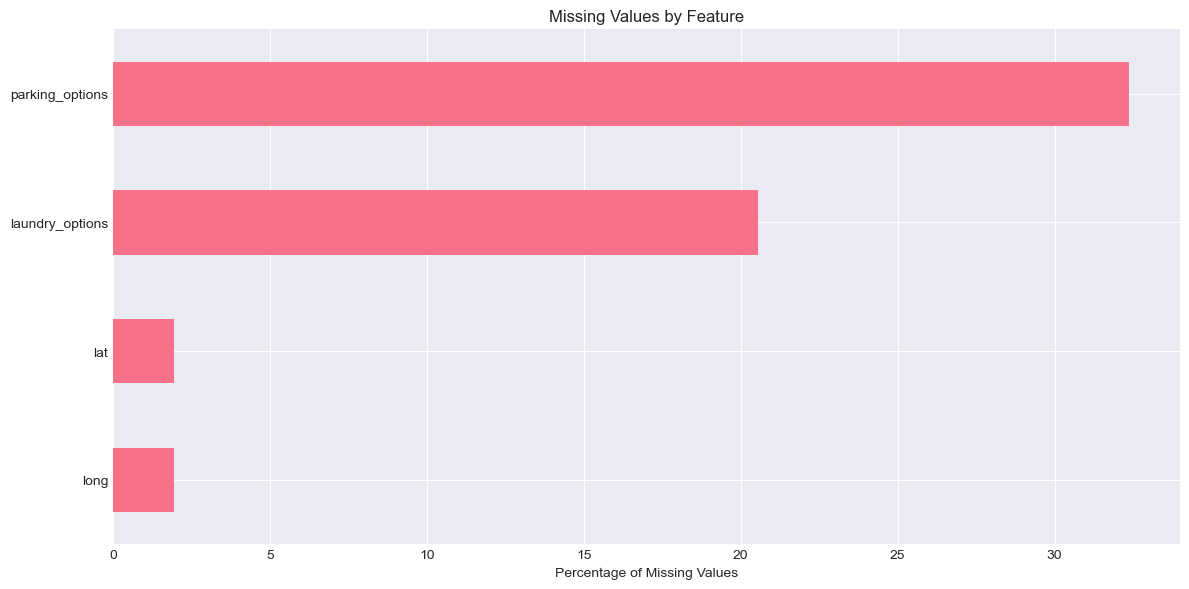

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
missing_plot = missing_df[missing_df['Missing Count'] > 0].sort_values('Percentage')
missing_plot['Percentage'].plot(kind='barh', ax=ax)
ax.set_xlabel('Percentage of Missing Values')
ax.set_title('Missing Values by Feature')
plt.tight_layout()
plt.show()


## 3. Target Variable Analysis


In [8]:
print("Price statistics:")
print(df['price'].describe())
print(f"\nSkewness: {df['price'].skew():.2f}")
print(f"Kurtosis: {df['price'].kurtosis():.2f}")


Price statistics:
count     5711.000000
mean      1739.403957
std        888.009723
min          0.000000
25%       1300.000000
50%       1646.000000
75%       2156.000000
max      38000.000000
Name: price, dtype: float64

Skewness: 15.27
Kurtosis: 540.31


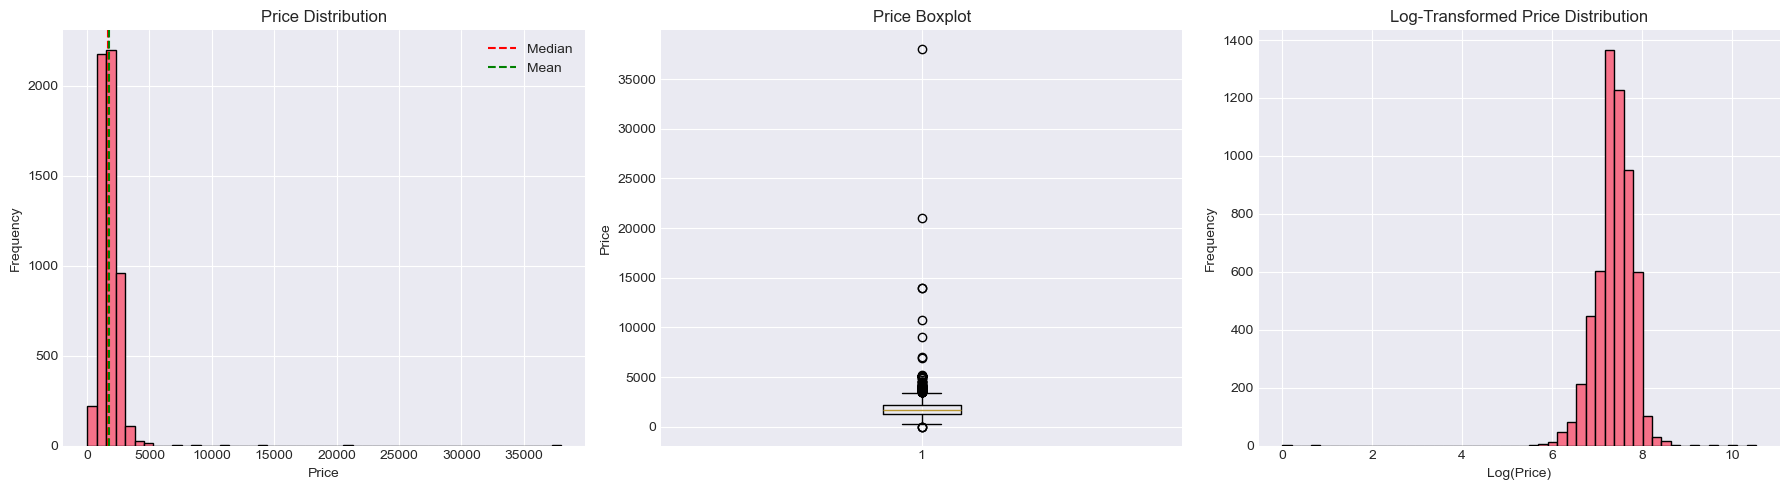

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(df['price'], bins=50, edgecolor='black')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')
axes[0].axvline(df['price'].median(), color='red', linestyle='--', label='Median')
axes[0].axvline(df['price'].mean(), color='green', linestyle='--', label='Mean')
axes[0].legend()

axes[1].boxplot(df['price'], vert=True)
axes[1].set_ylabel('Price')
axes[1].set_title('Price Boxplot')

axes[2].hist(np.log1p(df['price']), bins=50, edgecolor='black')
axes[2].set_xlabel('Log(Price)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Log-Transformed Price Distribution')

plt.tight_layout()
plt.show()


## 4. Categorical Variables Analysis


In [10]:
categorical_cols = ['region', 'type', 'laundry_options', 'parking_options']

for col in categorical_cols:
    print(f"\n{col.upper()} - Value Counts:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")



REGION - Value Counts:
region
south jersey    2203
central NJ      1980
north jersey     903
jersey shore     625
Name: count, dtype: int64
Unique values: 4

TYPE - Value Counts:
type
apartment        4793
house             551
townhouse         191
condo             109
duplex             30
manufactured       17
flat                9
loft                6
cottage/cabin       5
Name: count, dtype: int64
Unique values: 9

LAUNDRY_OPTIONS - Value Counts:
laundry_options
w/d in unit           3455
laundry on site        415
laundry in bldg        321
w/d hookups            264
no laundry on site      83
Name: count, dtype: int64
Unique values: 5

PARKING_OPTIONS - Value Counts:
parking_options
off-street parking    2113
attached garage        786
street parking         710
detached garage        111
carport                104
no parking              30
valet parking            8
Name: count, dtype: int64
Unique values: 7


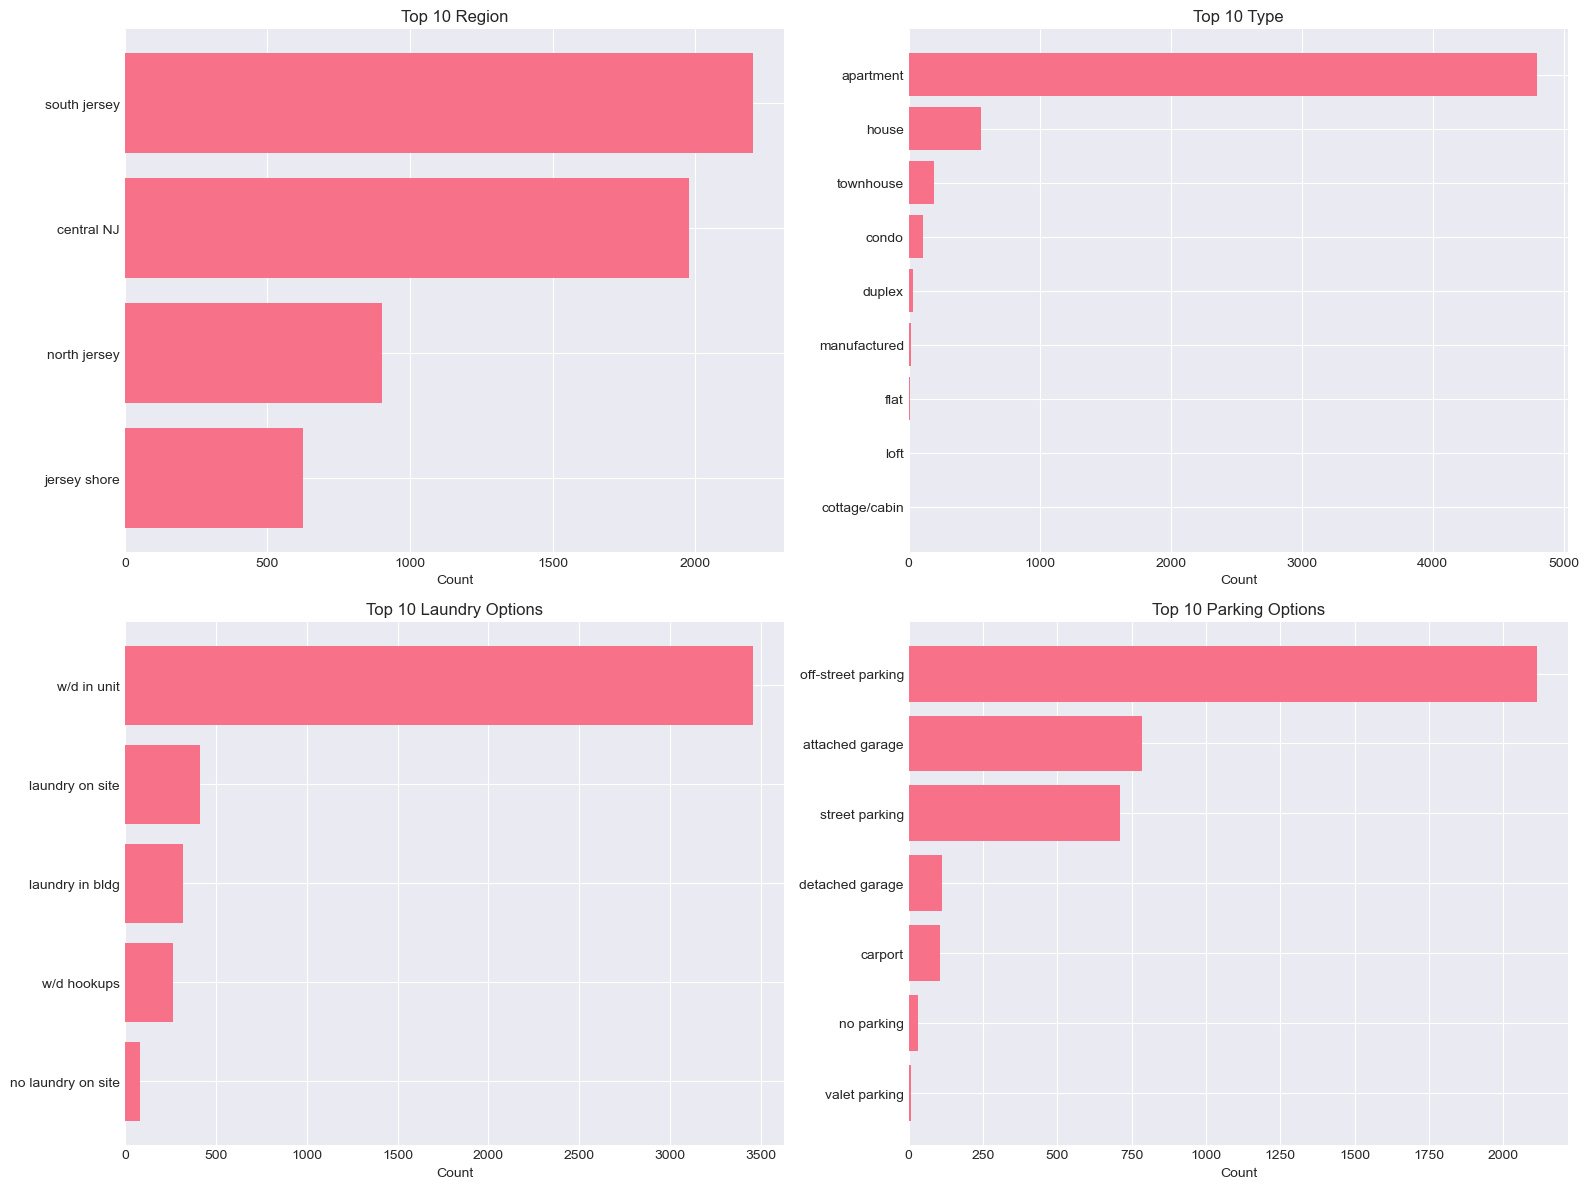

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    top_categories = df[col].value_counts().head(10)
    axes[idx].barh(range(len(top_categories)), top_categories.values)
    axes[idx].set_yticks(range(len(top_categories)))
    axes[idx].set_yticklabels(top_categories.index)
    axes[idx].set_xlabel('Count')
    axes[idx].set_title(f'Top 10 {col.replace("_", " ").title()}')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()


## 5. Numerical Features Analysis


In [12]:
numerical_cols = ['sqfeet', 'beds', 'baths', 'lat', 'long']

df[numerical_cols].describe()


,sqfeet,beds,baths,lat,long
count,5711.000000,5711.000000,5711.000000,5601.000000,5601.000000
mean,1035.760812,1.740151,1.441079,40.194521,-74.635661
std,498.941683,0.830081,0.550262,1.032569,1.618398
min,0.000000,0.000000,0.000000,-22.151700,-122.023000
25%,795.000000,1.000000,1.000000,39.880500,-74.906700
50%,963.000000,2.000000,1.000000,40.250700,-74.552800
75%,1192.000000,2.000000,2.000000,40.582300,-74.231300
max,18360.000000,8.000000,5.000000,43.731800,-73.428500


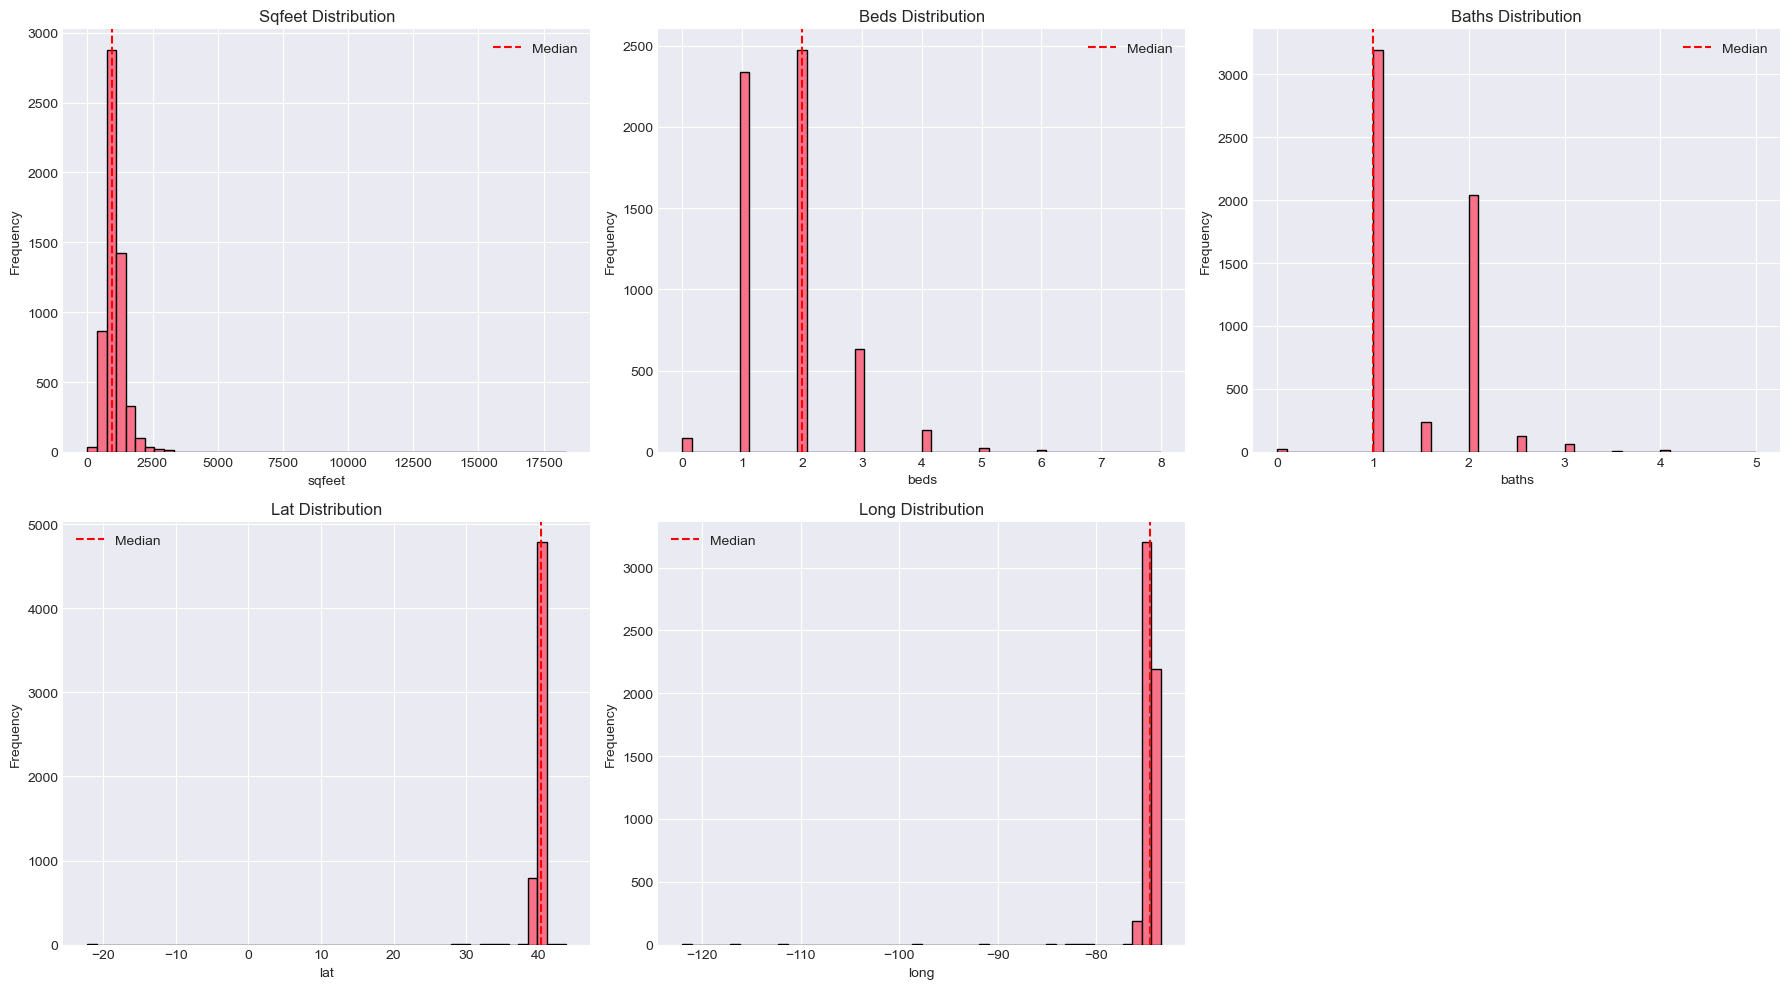

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if col in df.columns:
        axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'{col.replace("_", " ").title()} Distribution')
        axes[idx].axvline(df[col].median(), color='red', linestyle='--', label='Median')
        axes[idx].legend()

axes[-1].axis('off')
plt.tight_layout()
plt.show()


## 6. Price vs Key Features


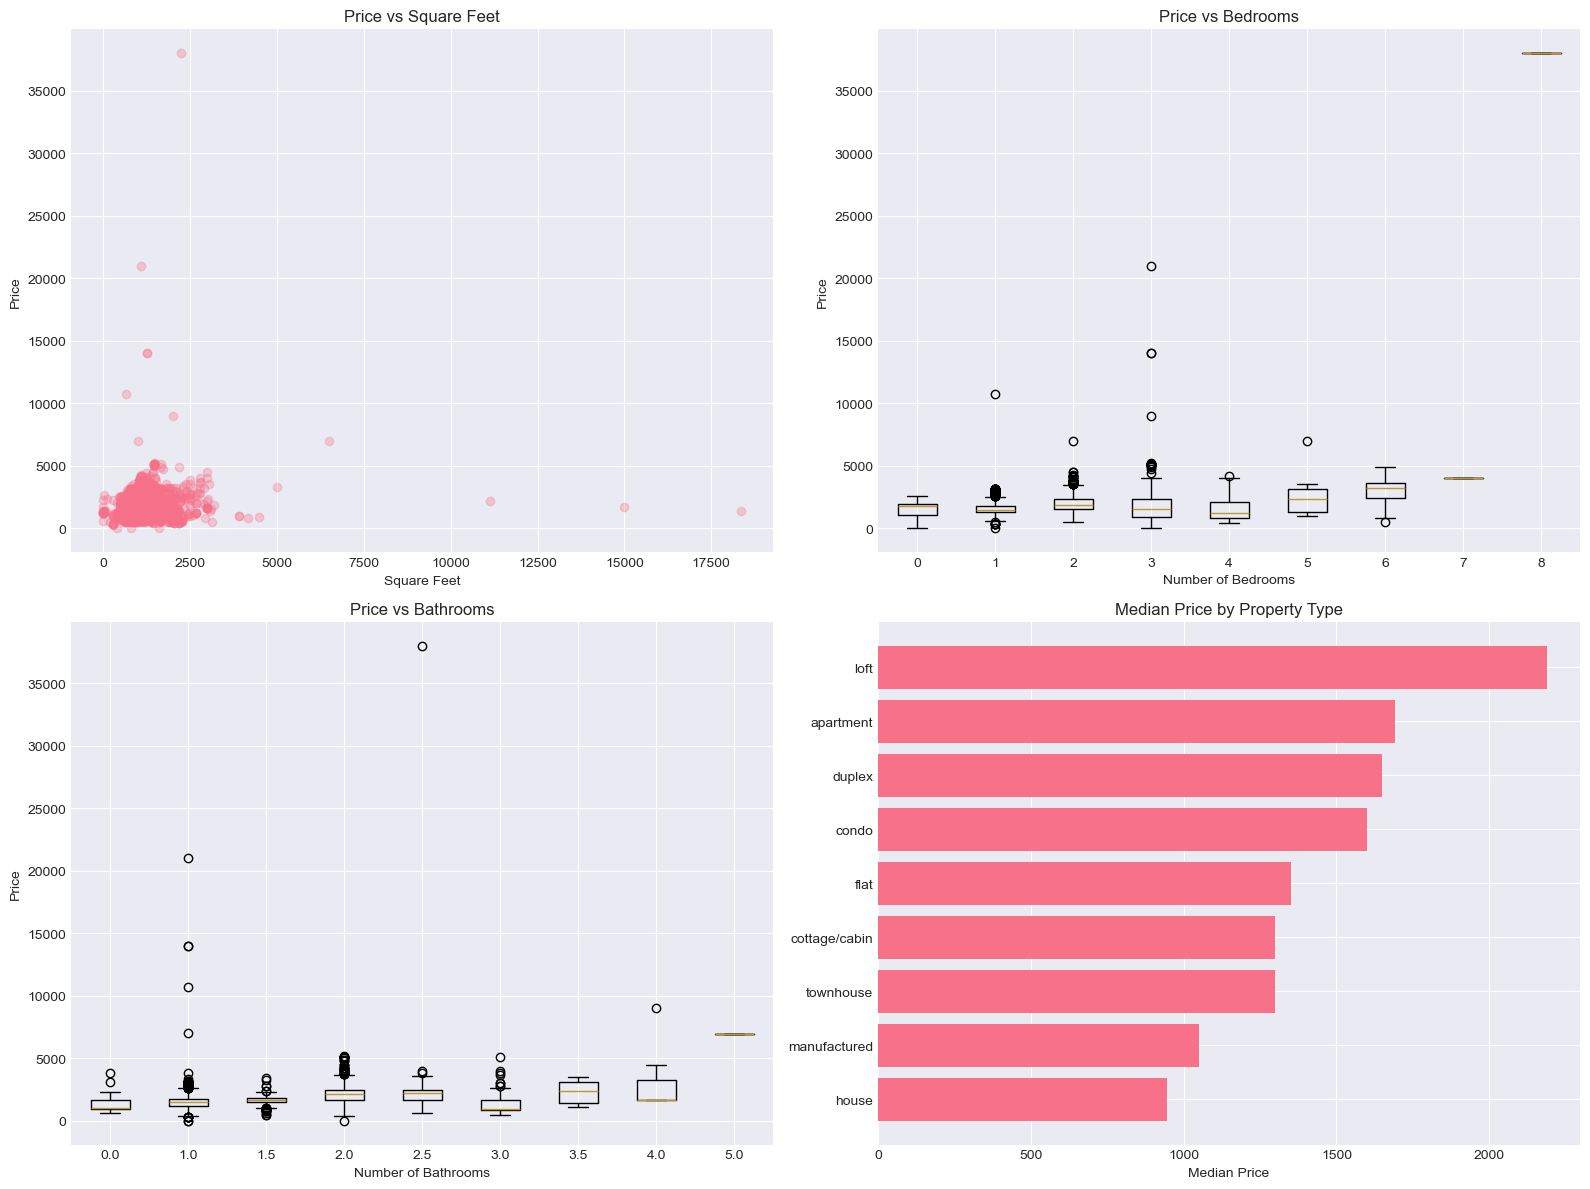

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].scatter(df['sqfeet'], df['price'], alpha=0.3)
axes[0, 0].set_xlabel('Square Feet')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Price vs Square Feet')

axes[0, 1].boxplot([df[df['beds']==i]['price'].dropna() for i in sorted(df['beds'].dropna().unique())], 
                     labels=sorted(df['beds'].dropna().unique()))
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_title('Price vs Bedrooms')

axes[1, 0].boxplot([df[df['baths']==i]['price'].dropna() for i in sorted(df['baths'].dropna().unique())], 
                     labels=sorted(df['baths'].dropna().unique()))
axes[1, 0].set_xlabel('Number of Bathrooms')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Price vs Bathrooms')

type_price = df.groupby('type')['price'].median().sort_values(ascending=False).head(10)
axes[1, 1].barh(range(len(type_price)), type_price.values)
axes[1, 1].set_yticks(range(len(type_price)))
axes[1, 1].set_yticklabels(type_price.index)
axes[1, 1].set_xlabel('Median Price')
axes[1, 1].set_title('Median Price by Property Type')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()


## 7. Geographic Analysis - NJ Housing Map


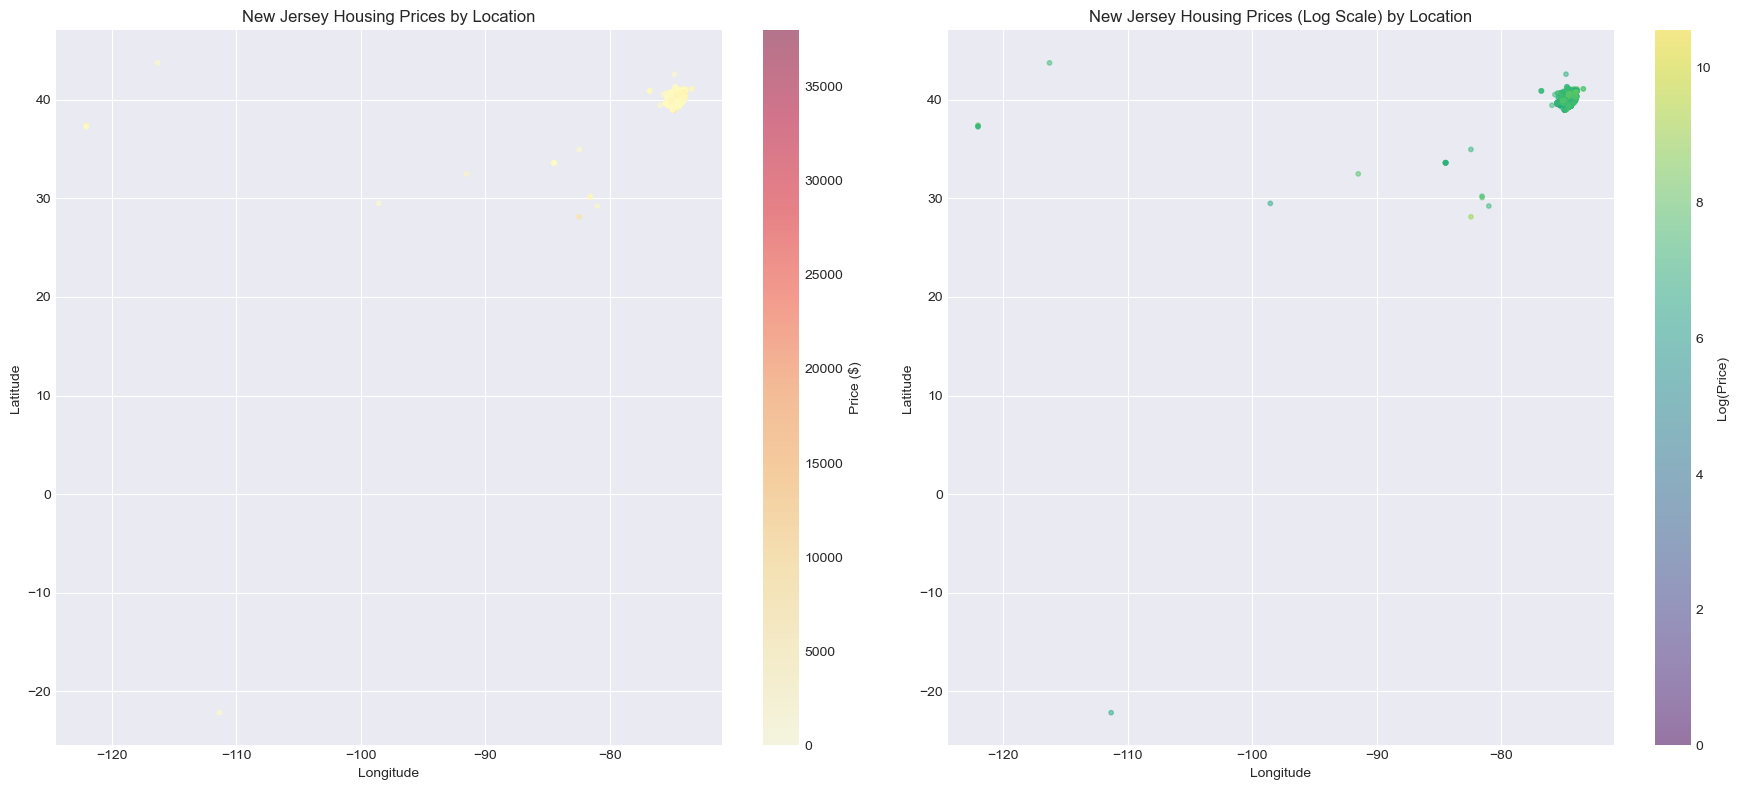

In [15]:
df_geo = df.dropna(subset=['lat', 'long', 'price'])

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

scatter1 = axes[0].scatter(df_geo['long'], df_geo['lat'], 
                           c=df_geo['price'], cmap='YlOrRd', 
                           alpha=0.5, s=10)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('New Jersey Housing Prices by Location')
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Price ($)')

scatter2 = axes[1].scatter(df_geo['long'], df_geo['lat'], 
                           c=np.log1p(df_geo['price']), cmap='viridis', 
                           alpha=0.5, s=10)
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('New Jersey Housing Prices (Log Scale) by Location')
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Log(Price)')

plt.tight_layout()
plt.show()


In [16]:
region_stats = df.groupby('region').agg({
    'price': ['mean', 'median', 'count']
}).round(2)
region_stats.columns = ['Mean Price', 'Median Price', 'Count']
region_stats = region_stats.sort_values('Median Price', ascending=False)
print("Price statistics by region:")
print(region_stats)


Price statistics by region:
              Mean Price  Median Price  Count
region                                       
north jersey     2071.03        2000.0    903
central NJ       1828.29        1800.0   1980
jersey shore     1865.62        1800.0    625
south jersey     1487.78        1400.0   2203


## 8. Amenities Analysis


In [17]:
amenities = ['cats_allowed', 'dogs_allowed', 'smoking_allowed', 
             'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished']

amenity_counts = df[amenities].sum().sort_values(ascending=False)
print("Amenities availability:")
print(amenity_counts)


Amenities availability:
cats_allowed               3848
dogs_allowed               3803
smoking_allowed            3436
wheelchair_access          1528
comes_furnished             232
electric_vehicle_charge      82
dtype: int64


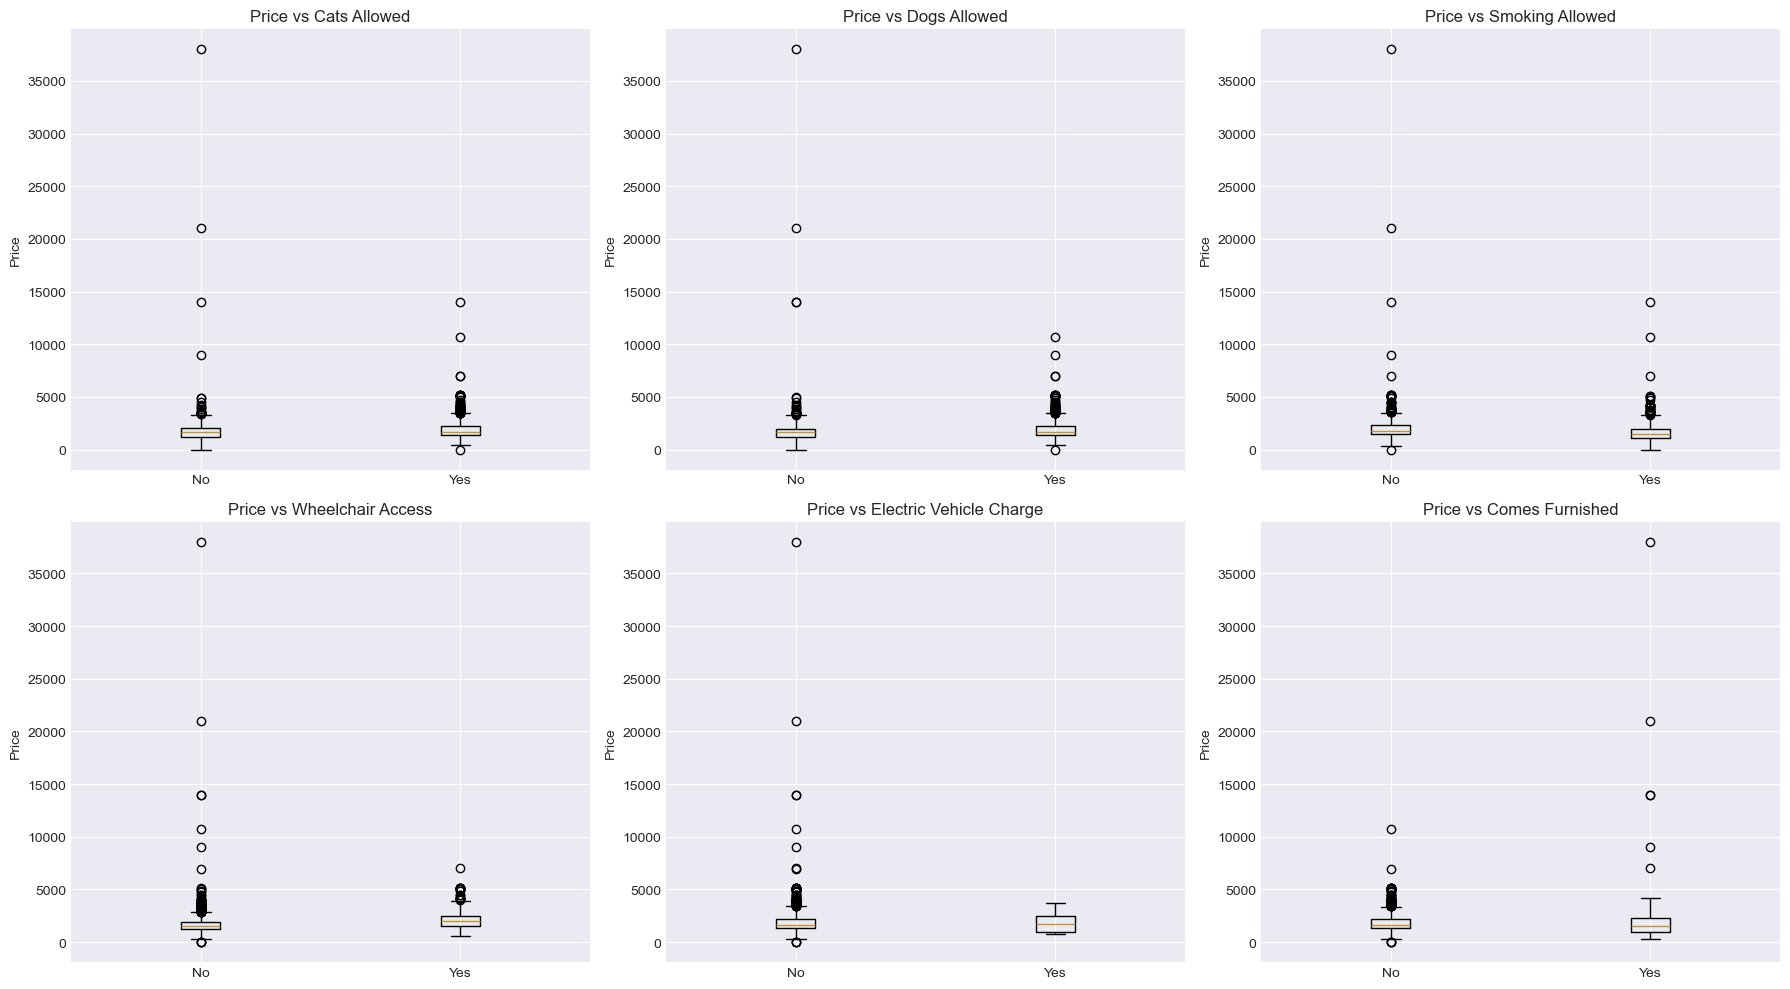

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, amenity in enumerate(amenities):
    df_amenity = df.dropna(subset=[amenity, 'price'])
    data = [df_amenity[df_amenity[amenity]==0]['price'].dropna(), 
            df_amenity[df_amenity[amenity]==1]['price'].dropna()]
    
    axes[idx].boxplot(data, labels=['No', 'Yes'])
    axes[idx].set_ylabel('Price')
    axes[idx].set_title(f'Price vs {amenity.replace("_", " ").title()}')

plt.tight_layout()
plt.show()


## 9. Correlation Analysis


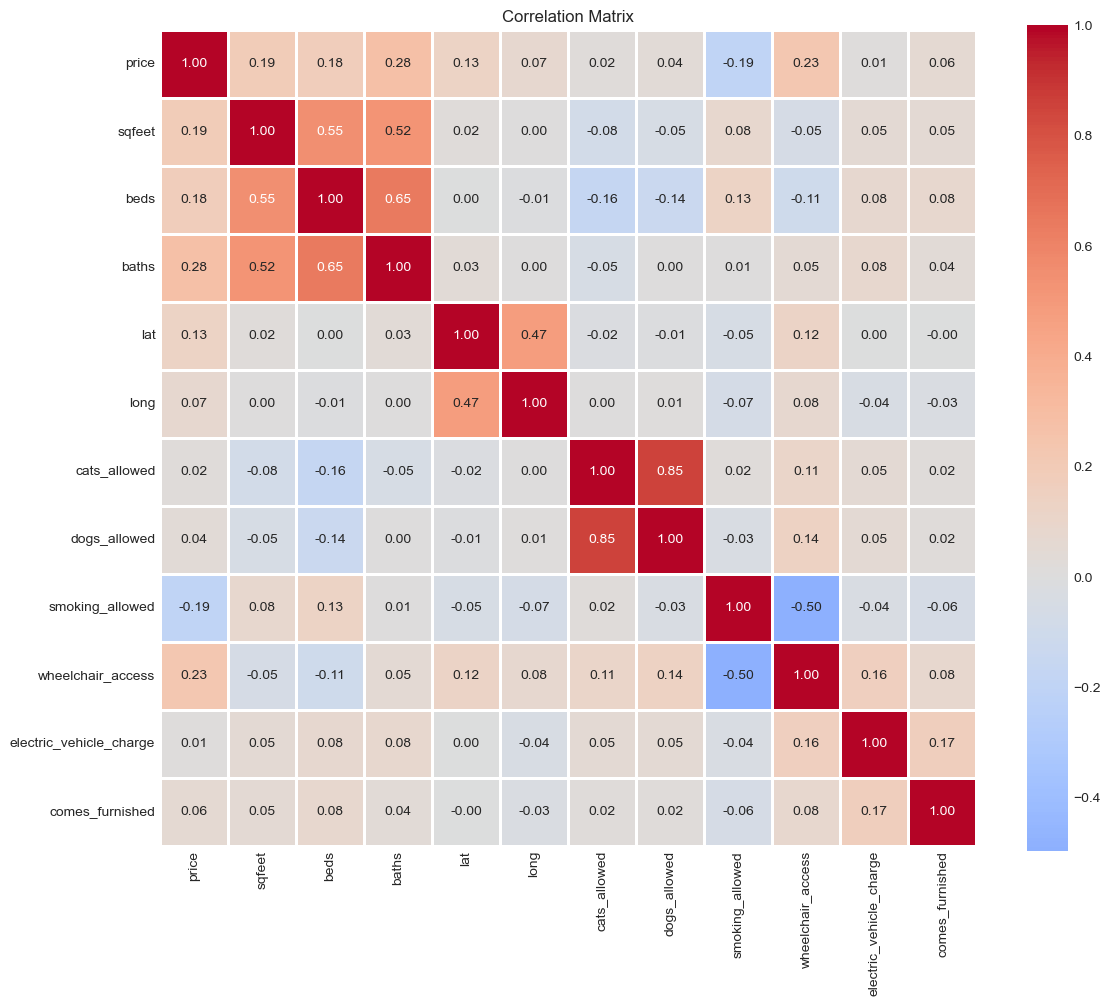

In [19]:
numeric_features = ['price', 'sqfeet', 'beds', 'baths', 'lat', 'long'] + amenities
correlation_data = df[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_data, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [20]:
price_corr = correlation_data['price'].drop('price').sort_values(ascending=False)
print("Correlation with Price:")
print(price_corr)


Correlation with Price:
baths                      0.277657
wheelchair_access          0.231613
sqfeet                     0.191977
beds                       0.175874
lat                        0.131578
long                       0.070815
comes_furnished            0.063916
dogs_allowed               0.039537
cats_allowed               0.022677
electric_vehicle_charge    0.013349
smoking_allowed           -0.194512
Name: price, dtype: float64


## 10. Outlier Detection


In [21]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of price outliers: {len(outliers)} ({100*len(outliers)/len(df):.2f}%)")
print(f"Price range: ${df['price'].min():.0f} - ${df['price'].max():.0f}")
print(f"IQR bounds: ${lower_bound:.0f} - ${upper_bound:.0f}")


Number of price outliers: 84 (1.47%)
Price range: $0 - $38000
IQR bounds: $16 - $3440



sqfeet: 224 outliers (3.92%)

price: 84 outliers (1.47%)


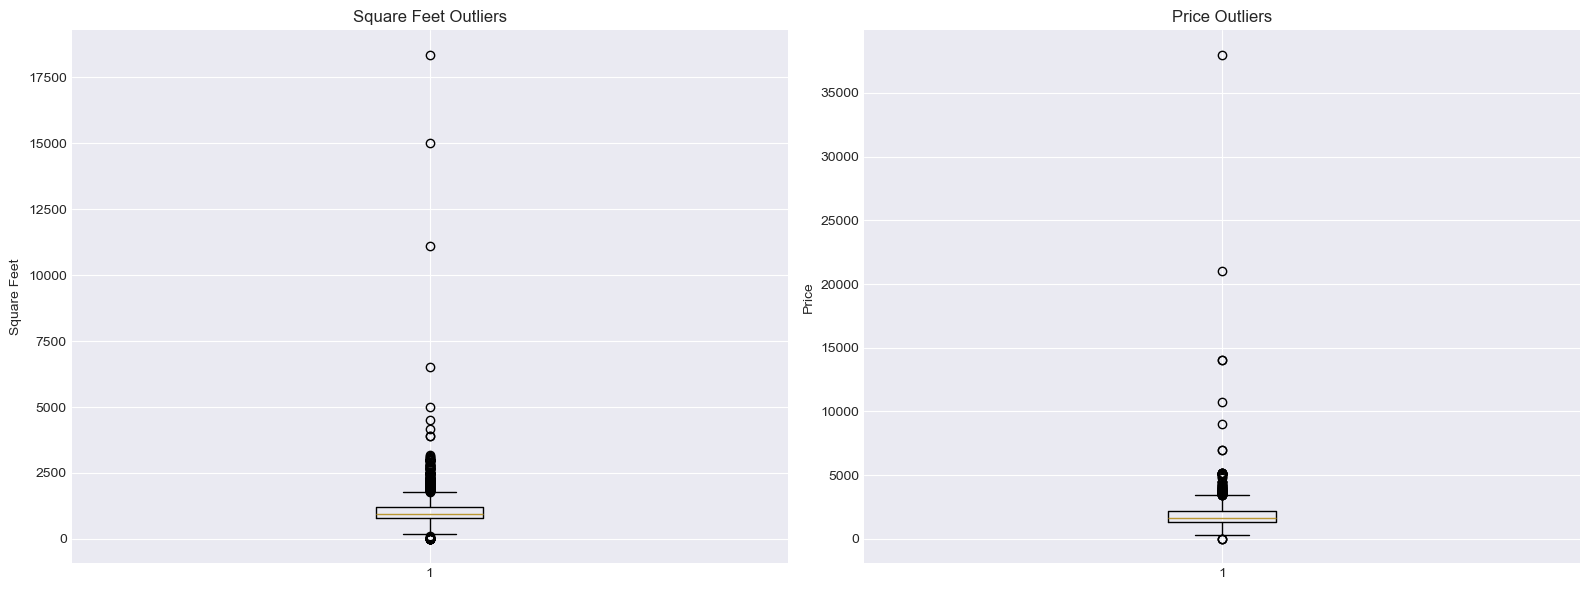

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for col in ['sqfeet', 'price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"\n{col}: {len(outliers)} outliers ({100*len(outliers)/len(df):.2f}%)")

axes[0].boxplot(df['sqfeet'].dropna())
axes[0].set_ylabel('Square Feet')
axes[0].set_title('Square Feet Outliers')

axes[1].boxplot(df['price'].dropna())
axes[1].set_ylabel('Price')
axes[1].set_title('Price Outliers')

plt.tight_layout()
plt.show()


## 11. Feature Engineering Preparation


In [23]:
df_clean = df.copy()

df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqfeet']
df_clean['total_rooms'] = df_clean['beds'] + df_clean['baths']
df_clean['amenity_count'] = df_clean[amenities].sum(axis=1)

df_clean['has_laundry'] = df_clean['laundry_options'].notna().astype(int)
df_clean['has_parking'] = df_clean['parking_options'].notna().astype(int)

print("New engineered features:")
print(df_clean[['price_per_sqft', 'total_rooms', 'amenity_count', 
                'has_laundry', 'has_parking']].describe())


New engineered features:
       price_per_sqft  total_rooms  amenity_count  has_laundry  has_parking
count     5711.000000  5711.000000    5711.000000  5711.000000  5711.000000
mean              inf     3.181229       2.263877     0.794607     0.676239
std               NaN     1.258486       1.109530     0.404024     0.467951
min          0.000000     1.000000       0.000000     0.000000     0.000000
25%          1.409119     2.000000       1.000000     1.000000     0.000000
50%          1.695130     3.000000       3.000000     1.000000     1.000000
75%          2.125000     4.000000       3.000000     1.000000     1.000000
max               inf    10.500000       6.000000     1.000000     1.000000


## 12. Data Quality Summary


In [24]:
print("="*60)
print("DATA QUALITY SUMMARY")
print("="*60)
print(f"Total observations: {len(df)}")
print(f"Total features: {df.shape[1]}")
print(f"\nComplete cases: {df.dropna().shape[0]} ({100*df.dropna().shape[0]/len(df):.2f}%)")
print(f"\nTarget variable (price):")
print(f"  - Missing: {df['price'].isnull().sum()}")
print(f"  - Range: ${df['price'].min():.0f} - ${df['price'].max():.0f}")
print(f"  - Mean: ${df['price'].mean():.0f}")
print(f"  - Median: ${df['price'].median():.0f}")
print(f"\nKey features for modeling:")
print(f"  - sqfeet: {df['sqfeet'].notna().sum()} available")
print(f"  - beds: {df['beds'].notna().sum()} available")
print(f"  - baths: {df['baths'].notna().sum()} available")
print(f"  - lat/long: {df[['lat','long']].dropna().shape[0]} available")
print("="*60)


DATA QUALITY SUMMARY
Total observations: 5711
Total features: 20

Complete cases: 3732 (65.35%)

Target variable (price):
  - Missing: 0
  - Range: $0 - $38000
  - Mean: $1739
  - Median: $1646

Key features for modeling:
  - sqfeet: 5711 available
  - beds: 5711 available
  - baths: 5711 available
  - lat/long: 5601 available


## 13. Recommendations for Modeling

Key findings for Lasso and Ridge regression:

1. Target variable distribution is right-skewed - consider log transformation
2. Strong predictors: sqfeet, beds, baths show clear relationship with price
3. Geographic features (lat/long) capture regional price variations
4. Missing values present in several features - need imputation strategy
5. Outliers detected in price and sqfeet - consider capping or removal
6. Categorical variables (type, region, parking, laundry) need encoding
7. Feature engineering shows potential (price per sqft, total rooms, amenity count)

Next steps:
- Handle missing values (median/mode imputation or removal)
- Remove or cap outliers based on domain knowledge
- Encode categorical variables (one-hot or target encoding)
- Scale numerical features for Ridge/Lasso
- Consider polynomial features for key predictors
- Split data into train/validation/test sets
